<a href="https://colab.research.google.com/github/Tawheed-DS/Hotel-booking-analysis/blob/main/CH_Tawheed_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Data files/Copy of Hotel Bookings.csv'

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#Let's do some preliminary analysis for the start

In [4]:
#Read the Data file into a dataframe
original_df = pd.read_csv(path)

In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Clearly there are some features which may or may not be useful to us. Plus if we can do away with the columns which have missing values we can straighten out our Dataframe a bit.
 <i>For now let's see how many null values do we have in each column and which one has the highest</i>

In [6]:
original_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

##There are about 4 columns in the Dataframe which have null values and none of the datatypes seem to be misplaced. Folks! we have a surprisingly clean dataframe, cheers!
 Let's delve a bit deeper and see what are the unique values in number and in kind!

In [7]:
original_df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [8]:
original_df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

#Let's get rid of the rudimentary stuff already!
 <i>So here the columns we are going to keep and the ones we will just throw out, take a peek!</i>

In [9]:
#Columns in the original dataframe
original_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
#List of columns we would like to keep
features_of_interest = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month','arrival_date_day_of_month','stays_in_weekend_nights',
       'stays_in_week_nights','children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'total_of_special_requests',
       'reservation_status']

In [11]:
#list of columns we will drop
features_to_be_dropped = ['arrival_date_week_number',
                          'agent','company',
                          'reservation_status_date']

##Now we don't want to ruin the original data here so will begin with creating a copy of it so we can lay our hands on it without having to be afraid of ruining the whole show!

In [12]:
#Creating a copy of original dataframe using (.copy) method
new_df = original_df.copy()

##There are 4 missing values in the children column, we can easily assume that those people brought no children to the party!
 <i>Okay so let's assume that and also let's get on with dropping columns</i>

In [13]:
# Replace null values in children column with zero
new_df.loc[new_df.children.isnull(),'children'] = 0

In [14]:
# Drop the columns which don't provide any usable information
new_df.drop(columns=['agent','company','arrival_date_week_number',
                     'reservation_status_date'],inplace=True)

##So we are down by five columns, we use this dataframe now onwards and in case we change our mind about something we also have original data with us <i>so chill!</i>
 <b>Now let's have a look at the brand new dataframe </b>

In [15]:
#The new dataframe info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [16]:
new_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


#Let's get down to bussiness now!

##We will begin by getting an idea about how each of the resort hotel and city hotel has performed for the given three years
<b>Note: we will use a new dataframe in which only non cancelled bookings are taken into account so that a true picture of booking trend is revealed</b>

In [196]:
#Create a dataframe which has only non-cancelled bookings
Non_cancelled_bookings = new_df[new_df['is_canceled']==0]

In [187]:
#Hotel types that we have
Non_cancelled_bookings['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

##Let's just take the resort hotel and look at the bookings that have been done there and see if the sales are in an uptrend or a downtrend.

In [195]:
#Apply required boolean filter
resort_hotel_sales = Non_cancelled_bookings[Non_cancelled_bookings['hotel']=='Resort Hotel']['arrival_date_year'].value_counts()
#Sort the series by years
resort_hotel_sales = resort_hotel_sales.sort_index()
resort_hotel_sales

2015     6176
2016    13637
2017     9125
Name: arrival_date_year, dtype: int64

Text(0.5, 0, 'Year')

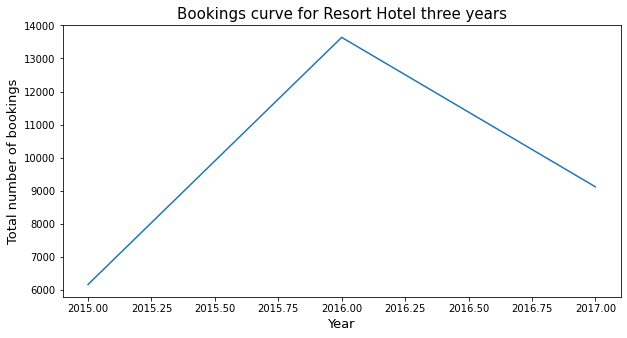

In [201]:
#Create a figure of required size
plt.rcParams['figure.figsize'] = (10, 5)
# Create the plot object
plt.plot(resort_hotel_sales)
# x = index, y = value
# dataframe (10 columns):   x = 'col5', y = 'col7'

plt.title('Bookings curve for Resort Hotel three years',fontdict = {'fontsize':15})
plt.ylabel('Total number of bookings',fontdict = {'fontsize':13})
plt.xlabel('Year',fontdict = {'fontsize':13})


## Now let's do the same for city hotel

In [193]:
#Apply the required boolean
city_hotel_sales = Non_cancelled_bookings[Non_cancelled_bookings['hotel']=='City Hotel']['arrival_date_year'].value_counts()
#Sort by years
city_hotel_sales = city_hotel_sales.sort_index()
city_hotel_sales

2015     7678
2016    22733
2017    15817
Name: arrival_date_year, dtype: int64

Text(0.5, 0, 'Year')

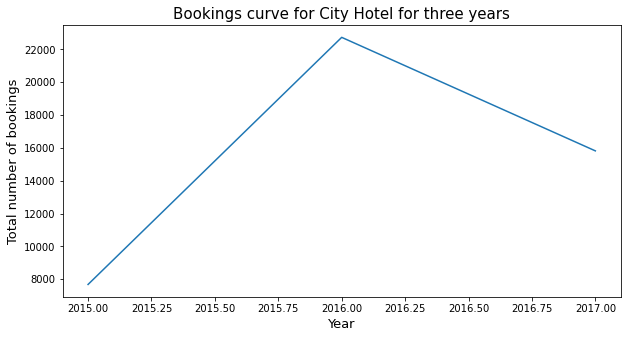

In [202]:
plt.rcParams['figure.figsize'] = (10, 5)
# Create the plot object
plt.plot(city_hotel_sales)
# x = index, y = value
# dataframe (10 columns):   x = 'col5', y = 'col7'

plt.title('Bookings curve for City Hotel for three years',fontdict = {'fontsize':15})
plt.ylabel('Total number of bookings',fontdict = {'fontsize':13})
plt.xlabel('Year',fontdict = {'fontsize':13})


When we take a look at each of the curves we can clearly see that bookings, (or sales because that's what they are) have fallen for both the hotels but for Resort Hotel they have fallen more sharply!

#It would also be beneficial to see a price trend in each hotel

In [216]:
median_price = Non_cancelled_bookings.groupby('hotel')['adr'].median()


Text(0.5, 0, 'Hotel')

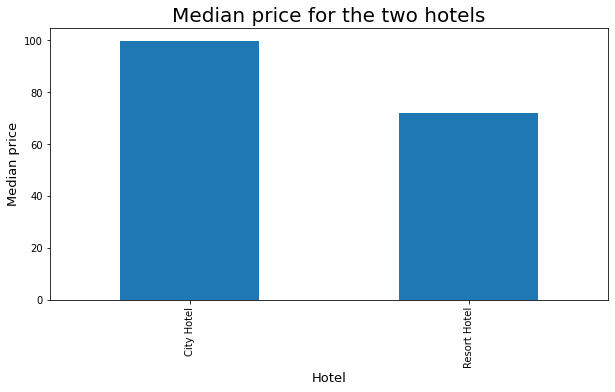

In [219]:
#plot a bar graph for above data
plt.rcParams['figure.figsize'] = (10, 5)

median_price.plot(kind='bar')

#Give title and x,y labels
plt.title('Median price for the two hotels',fontdict = {'fontsize':20})
plt.ylabel('Median price',fontdict = {'fontsize':13})
plt.xlabel('Hotel',fontdict = {'fontsize':13})

So clearly it costs more to stay in a city hotel than in a resort hotel. This data is also in sync with our previous analysis in which we found out that the city hotel was in more demand than the resort hotel and obviously more the demand greater the price, <b>basic economics folks! </b>

#<b>Now let's go a bit deeper and see what kind of further exciting insights can we draw using our EDA of this dataframe which can ultimately be of benefit to a customer.</b> 
##Suppose you are from a country 'x' and you want to book a room for stay and you are confused about picking either  a resort hotel or a city hotel, then it does make sense to check what the folks from your own country are prefering the most. 
We will only include those bookings which weren't cancelled at a later stage, In that case let's go ahead and do that.

In [17]:
# Perform a groupby operation and obtain the value counts
hotel_vs_country = new_df[new_df['is_canceled']==0].groupby('country',as_index=True)['hotel'].value_counts()

In [18]:
#Perform a sort on the produced series
hotel_vs_country = hotel_vs_country.sort_values(ascending=False)
#create a dataframe from the series
hotel_vs_country_df = pd.DataFrame(hotel_vs_country)

#Rename the only column the dataframe has as the no of bookings
hotel_vs_country_df.columns= ['no of bookings']


#We reset the index to make a full fledged dataframe
hotel_vs_country_df = hotel_vs_country_df.reset_index()
hotel_vs_country_df

,country,hotel,no of bookings
0,PRT,City Hotel,10879
1,PRT,Resort Hotel,10192
2,FRA,City Hotel,7081
3,GBR,Resort Hotel,5923
4,DEU,City Hotel,5012
...,...,...,...
263,PLW,Resort Hotel,1
264,PRI,City Hotel,1
265,BIH,Resort Hotel,1
266,PYF,City Hotel,1


In [ ]:
#Draw a plot here


As we can clearly tell from the dataframe if you are from portugal your slightly better choice will be a city hotel over a resort hotel, similarly we can check for other countries as well.

## If you are going to stay at a hotel and are paying hefty price in that order you better make sure that the food served at that place is of good quality.
 In order to do that we have a clue in the data, we will make use of meals column of our dataframe and find out what people are choosing to eat at a particular hotel, we can also relate it to a particular country and see if we can come up with a trend for each

In [19]:
#Check what categories of meal feature do we have in the data
new_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

##People at each hotel can choose from four categories of meals which they can book their respective stays with, let's briefly see what those are;
1. Undefined/SC – no meal package
2. BB – Bed & Breakfast 
3. HB – Half board (breakfast and one other meal – usually dinner)
4. FB – Full board (breakfast, lunch and dinner)

In [238]:
#First perform a groupby 

popular_meal_category = new_df.groupby(['hotel'])['meal'].value_counts()
popular_meal_category


hotel         meal     
City Hotel    BB           62305
              SC           10564
              HB            6417
              FB              44
Resort Hotel  BB           30005
              HB            8046
              Undefined     1169
              FB             754
              SC              86
Name: meal, dtype: int64

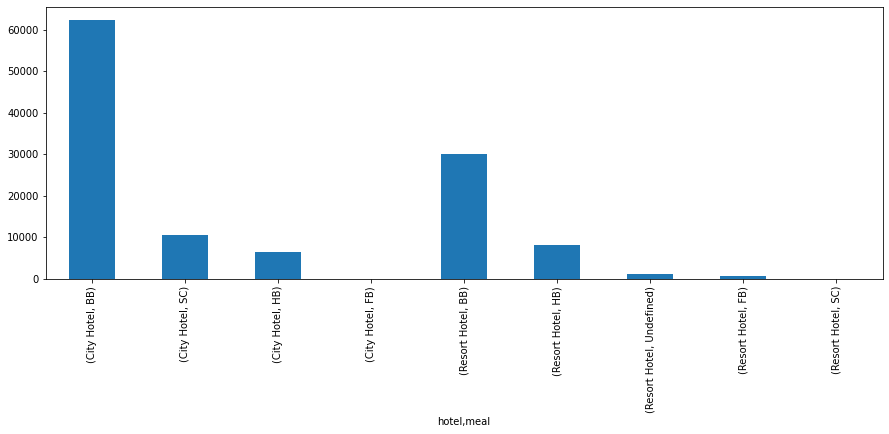

In [234]:
#Define a figure size
plt.rcParams['figure.figsize'] = (15,5)
#Plot a bar graph
popular_meal_category.plot(kind= 'bar')



We have made you life really easy by creating the above chart, let me explain how. We have each hotel with respective food categories and the number of booking that people are doing in each hotel with each meal category, now it should not take you much long to figure out that be it Resort Hotel or city Hotel, people mostly prefer to go with the BB-category which is nothing more than bread and breakfast!

##If that doesn't satisfy you we have more in account for your satisfaction, let's give you a country-wise breakup of meal categories so that you can see which countries prefer which meal category the most, awesome right!

In [23]:
#Choosing the features of interest
full_meal_country_vs_hotel = new_df[['country','meal','hotel']]
#Perform a groupby for country and hotel as keys
full_meal_country_vs_hotel = full_meal_country_vs_hotel.groupby(['country','hotel'])['meal'].value_counts()
#Create a dataframe
full_meal_country_vs_hotel_df = pd.DataFrame(full_meal_country_vs_hotel)
#Rename the coulmn we have in the dataframe as no of bookings
full_meal_country_vs_hotel_df.columns = ['no of bookings']
#obtain a sorted dataframe to get a better picture 
full_meal_country_vs_hotel_df = full_meal_country_vs_hotel_df.sort_values('no of bookings',ascending=False)
full_meal_country_vs_hotel_df

no of bookings
country hotel        meal                
PRT     City Hotel   BB             26544
        Resort Hotel BB             13012
FRA     City Hotel   BB              6952
GBR     Resort Hotel BB              5278
DEU     City Hotel   BB              4069
...                                   ...
LVA     City Hotel   HB                 1
MAC     Resort Hotel BB                 1
MAR     Resort Hotel FB                 1
MDG     Resort Hotel BB                 1
ZWE     Resort Hotel HB                 1

[583 rows x 1 columns]

##Now that we are done with the meals, let's go ahead and check out the rooms. I am sure you will need our help to figure out which rooms you should choose and which ones you should not!

In [24]:
#Check the room categories we have
new_df.reserved_room_type.nunique(),new_df.reserved_room_type.unique()

(10, array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object))

##As we can see we have ten different room categories and each category must be better suited for certain customers, so we will try to find that very thing. This is how we will proceed;

1. We will first take into consideration that only adults are staying in the hotel rooms and see if number of adults have a relation with rooms that they select.

2. We will next do the same for children and babies, if there are any.

In [55]:
sorted(new_df.adults.unique())

[0, 1, 2, 3, 4, 5, 6, 10, 20, 26, 27, 40, 50, 55]

##Most of the travellers are either a single adult or a couple of adults, let's see if data can help us select better rooms for such travellers 

In [137]:
#create a series with given boolen filtering
adults_less_than_3 = new_df[(new_df['adults'] == 1) |(new_df['adults'] == 2)]['reserved_room_type'].value_counts()

Text(0.5, 0, 'Room type')

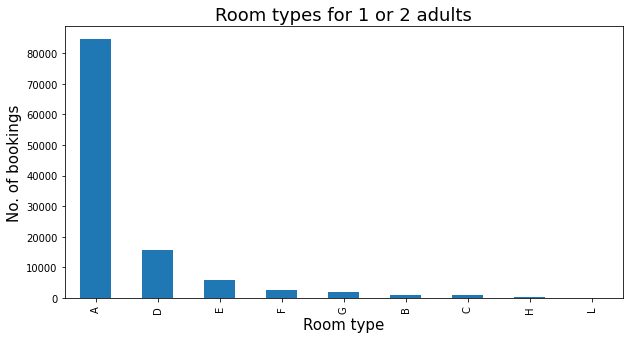

In [138]:
#plot a bar graph to visualize the data
plt.rcParams['figure.figsize'] = (10, 5)

adults_less_than_3.plot(kind='bar')

#Give title and x,y labels
plt.title('Room types for 1 or 2 adults',fontdict = {'fontsize':18})
plt.ylabel('No. of bookings',fontdict = {'fontsize':15})
plt.xlabel('Room type',fontdict = {'fontsize':15})

Clearly such travellers have gone overwhelmingly with A-type rooms, there is no reason you shouldn't too!

##In case you are travelling with 3 adults 

Text(0.5, 0, 'Room type')

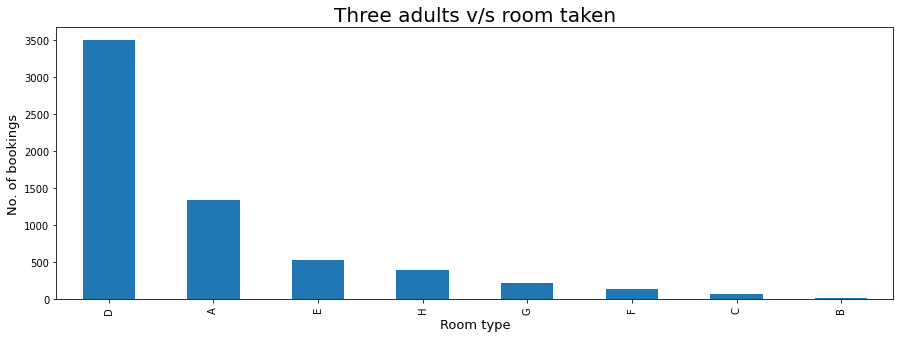

In [139]:
#create a series with given boolen filtering
Three_adults = new_df[new_df['adults'] == 3]['reserved_room_type'].value_counts()
#plot a bar graph to visualize the data
plt.rcParams['figure.figsize'] = (15, 5)

Three_adults.plot(kind='bar')

#Give title and x,y labels
plt.title('Three adults v/s room taken',fontdict = {'fontsize':20})
plt.ylabel('No. of bookings',fontdict = {'fontsize':13})
plt.xlabel('Room type',fontdict = {'fontsize':13})

Hence room type-D is the most preffered room in this case followed by room type-A

##There aren't many people who are booking rooms for more than four people, but in case you are one of them you can easily choose from A,E,D room types in the same order of priority.

Text(0.5, 0, 'Room type')

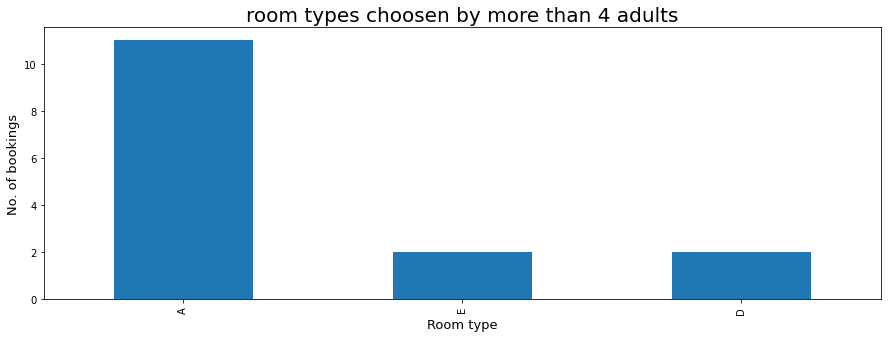

In [123]:
#Create a series based on required boolean condition
more_adults = new_df[(new_df['adults'] >4) & (new_df['adults'] <55)]['reserved_room_type'].value_counts()
#plot a bar graph to visualize the data
plt.rcParams['figure.figsize'] = (15, 5)

more_adults.plot(kind='bar')

#Give title and x,y labels
plt.title('room types choosen by more than 4 adults',fontdict = {'fontsize':20})
plt.ylabel('No. of bookings',fontdict = {'fontsize':13})
plt.xlabel('Room type',fontdict = {'fontsize':13})

##If in case there are no adults checking in then we are left with children and babies, this is absolutely possible because adults can book rooms for their children at places they aren't themselves moving to. Let's just take a look at what data has to say about this!

In [59]:
new_df[new_df['adults'] == 0][['children','babies',]]

,children,babies
2224,0.0,0
2409,0.0,0
3181,0.0,0
3684,0.0,0
3708,0.0,0
...,...,...
117204,2.0,0
117274,2.0,0
117303,2.0,0
117453,2.0,0


<i>As you might have expeced there are children without adults (of course there can be) but there are no babies (of course there can't be), makes sense right!</i>

#Now let's say you want to send your kids somewhere and they are alone in this, in order for them to make the most of their trip and enjoy every moment you would want the best for your kids. But how do you select the best, don't get carried away, *everything shall be answered through the data*, just stay with us!

In [105]:
#Create a dataframe with the condition that only children are staying
children_only = new_df[new_df['adults'] == 0]['reserved_room_type'].value_counts()

children_only

B    211
A    131
D     23
E     17
P     12
F      5
G      3
C      1
Name: reserved_room_type, dtype: int64

Text(0.5, 0, 'Room type')

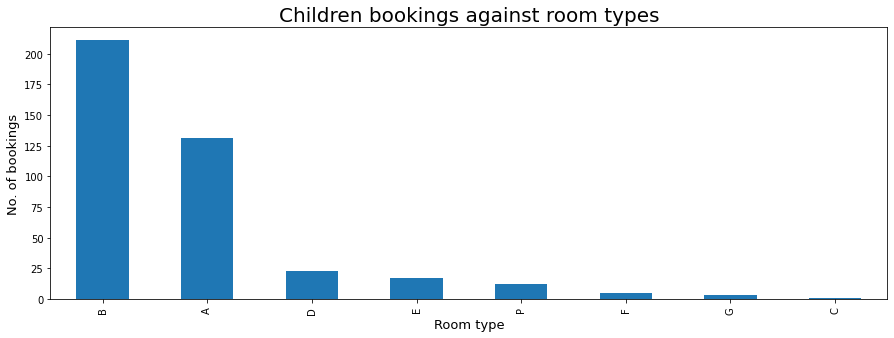

In [106]:
#plot a bar graph for above data
plt.rcParams['figure.figsize'] = (15, 5)

children_only.plot(kind='bar')

#Give title and x,y labels
plt.title('Children bookings against room types',fontdict = {'fontsize':20})
plt.ylabel('No. of bookings',fontdict = {'fontsize':13})
plt.xlabel('Room type',fontdict = {'fontsize':13})

#Bar plot


Now the beautiful thing is that you don't need to be a data scientist to read this graph that we produced, results are pretty simple, if you are booking a hotel room for your kid Room-B will be the best choice for you only to be followed by Room-A, because that's where the big chunk of bookings is happening!